<a href="https://colab.research.google.com/github/ayesha-0610/AlmaBetter_module-task/blob/main/Module3_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, I started by researching the platform in depth to understand its main features and how users interact with it.

Next, I analyzed real-world problems the platform aims to solve and evaluated how effective its solutions are in improving user experience.

To make this more relatable, I developed a detailed case study that highlights common user challenges and demonstrates how the platform’s unique features help overcome them.

After that, I designed a well-structured data schema that clearly defines entities, attributes, and relationships to match the platform’s functionality.

I also explained the rationale behind each design choice and the strategy that ensures all elements align with the platform’s overall goals.

To visually represent the data connections, I created an ER diagram showing how information flows and is organized within the system.

Throughout this process, I focused on presenting my ideas clearly and effectively, ensuring the explanation is easy to follow and engaging.

Finally, I enhanced the presentation with visuals and clean formatting to make it more professional and visually appealing.



STEP 1: Setup Database

In [ ]:
import sqlite3
import pandas as pd

# Create in-memory database
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Create tables
cursor.executescript("""
CREATE TABLE Users(
    UserID INTEGER PRIMARY KEY,
    Name TEXT,
    Email TEXT,
    Location TEXT
);

CREATE TABLE Sellers(
    SellerID INTEGER PRIMARY KEY,
    Name TEXT,
    Rating REAL
);

CREATE TABLE Products(
    ProductID INTEGER PRIMARY KEY,
    Name TEXT,
    Price REAL,
    Category TEXT,
    SellerID INTEGER,
    FOREIGN KEY (SellerID) REFERENCES Sellers(SellerID)
);

CREATE TABLE Orders(
    OrderID INTEGER PRIMARY KEY,
    UserID INTEGER,
    OrderDate TEXT,
    TotalAmount REAL,
    FOREIGN KEY (UserID) REFERENCES Users(UserID)
);

CREATE TABLE OrderItems(
    OrderItemID INTEGER PRIMARY KEY,
    OrderID INTEGER,
    ProductID INTEGER,
    Quantity INTEGER,
    Subtotal REAL,
    FOREIGN KEY (OrderID) REFERENCES Orders(OrderID),
    FOREIGN KEY (ProductID) REFERENCES Products(ProductID)
);

CREATE TABLE Reviews(
    ReviewID INTEGER PRIMARY KEY,
    ProductID INTEGER,
    UserID INTEGER,
    Rating REAL,
    Comment TEXT,
    FOREIGN KEY (ProductID) REFERENCES Products(ProductID),
    FOREIGN KEY (UserID) REFERENCES Users(UserID)
);
""")

print(" Database schema created successfully")

 Database schema created successfully


Step 2: Insert Sample Data

In [ ]:
# Insert Users
cursor.executemany("INSERT INTO Users(Name, Email, Location) VALUES (?, ?, ?)", [
    ("Alice", "alice@gmail.com", "Delhi"),
    ("Bob", "bob@yahoo.com", "Mumbai"),
    ("Charlie", "charlie@outlook.com", "Chennai")
])

# Insert Sellers
cursor.executemany("INSERT INTO Sellers(Name, Rating) VALUES (?, ?)", [
    ("TechWorld", 4.7),
    ("FashionHub", 4.3)
])

# Insert Products
cursor.executemany("INSERT INTO Products(Name, Price, Category, SellerID) VALUES (?, ?, ?, ?)", [
    ("Smartphone", 15999, "Electronics", 1),
    ("Laptop", 49999, "Electronics", 1),
    ("T-Shirt", 799, "Clothing", 2)
])

# Insert Orders
cursor.execute("INSERT INTO Orders(UserID, OrderDate, TotalAmount) VALUES (1, '2025-10-05', 65998)")
order_id = cursor.lastrowid

# Insert OrderItems
cursor.executemany("INSERT INTO OrderItems(OrderID, ProductID, Quantity, Subtotal) VALUES (?, ?, ?, ?)", [
    (order_id, 1, 1, 15999),
    (order_id, 2, 1, 49999)
])

# Insert Reviews
cursor.executemany("INSERT INTO Reviews(ProductID, UserID, Rating, Comment) VALUES (?, ?, ?, ?)", [
    (1, 1, 4.5, "Good budget phone"),
    (2, 1, 5.0, "Excellent performance"),
    (3, 2, 4.0, "Nice T-shirt")
])

conn.commit()
print(" Sample data inserted successfully")

 Sample data inserted successfully


Step 3: Run Queries

In [ ]:
# Query 1: Show all orders with user and product details
query = """
SELECT o.OrderID, u.Name AS Customer, p.Name AS Product, oi.Quantity, oi.Subtotal
FROM Orders o
JOIN Users u ON o.UserID = u.UserID
JOIN OrderItems oi ON o.OrderID = oi.OrderID
JOIN Products p ON oi.ProductID = p.ProductID
"""
df_orders = pd.read_sql(query, conn)
display(df_orders)

# Query 2: Total sales per seller
query2 = """
SELECT s.Name AS Seller, SUM(oi.Subtotal) AS TotalSales
FROM Sellers s
JOIN Products p ON s.SellerID = p.SellerID
JOIN OrderItems oi ON p.ProductID = oi.ProductID
GROUP BY s.SellerID
"""
df_sales = pd.read_sql(query2, conn)
display(df_sales)

# Query 3: Average ratings per product
query3 = """
SELECT p.Name AS Product, ROUND(AVG(r.Rating),2) AS AvgRating
FROM Products p
JOIN Reviews r ON p.ProductID = r.ProductID
GROUP BY p.ProductID
"""
df_ratings = pd.read_sql(query3, conn)
display(df_ratings)

,OrderID,Customer,Product,Quantity,Subtotal
0,1,Alice,Smartphone,1,15999.0
1,1,Alice,Laptop,1,49999.0


,Seller,TotalSales
0,TechWorld,65998.0


,Product,AvgRating
0,Smartphone,4.5
1,Laptop,5.0
2,T-Shirt,4.0


Step 4: Visualization

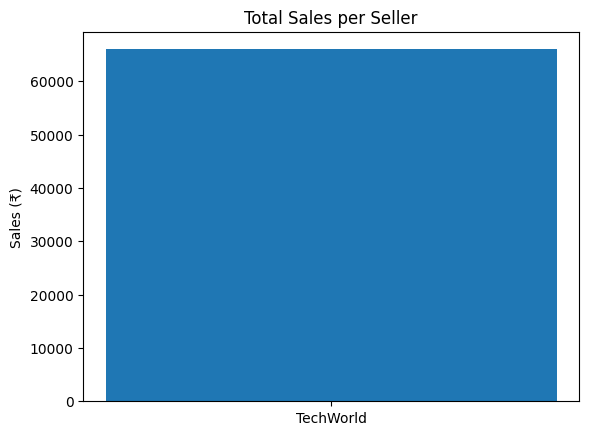

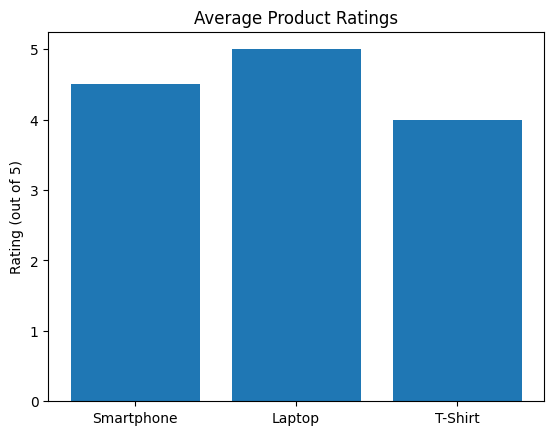

In [ ]:
import matplotlib.pyplot as plt # this library is used for visualization

# Sales bar chart
plt.bar(df_sales["Seller"], df_sales["TotalSales"])
plt.title("Total Sales per Seller")
plt.ylabel("Sales (₹)")
plt.show()

# Ratings chart
plt.bar(df_ratings["Product"], df_ratings["AvgRating"])
plt.title("Average Product Ratings")
plt.ylabel("Rating (out of 5)")
plt.show()

Step 5: ER Diagram

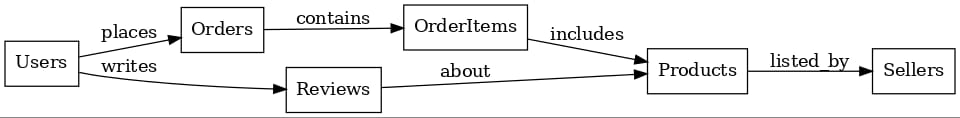